In [1]:
from __future__ import division, print_function, unicode_literals

%matplotlib inline
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib.colors import ListedColormap
import seaborn as sns

import csv
import pandas as pd
import numpy as np  
from io import StringIO
from urllib import request
from sklearn import preprocessing
import warnings

np.random.seed(42)

C:\Users\maxim\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Import Data
df= pd.read_csv("/Users/stansonwu/Downloads/2023 Spring/ISOM 676/Final Project/bank-additional/bank-additional-full.csv", sep=';')
df = df.rename(columns={'y': 'term deposit subscription'})
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term deposit subscription
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed',
       'term deposit subscription'],
      dtype='object')

## Data Cleaning & Feature Engineering

In [4]:
## Campaign and duration columns are known after the current campaign has end, therefore we need to drop the two columns to prevent data leakage
df1 = df.drop(['duration','campaign'],axis = 1)
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'term deposit subscription'],
      dtype='object')

In [6]:
print(df1.head(5))

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  pdays  previous     poutcome  emp.var.rate  \
0   may         mon    999         0  nonexistent           1.1   
1   may         mon    999         0  nonexistent           1.1   
2   may         mon    999         0  nonexistent           1.1   
3   may         mon    999         0  nonexistent           1.1   
4   may         mon    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0          93.994          -36.4      4.857       5191.0   
1          93.994   

In [7]:
# check null values and unique values 
for a in df1.columns:
    b = df1[a].unique()
    print(a)
    print(b)

age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
pdays
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
previous
[0 1 2 3 4 5 6 7]
poutcome
['nonexistent' 'failure' 'success']
emp.

In [8]:
# pdays with values 
len(df1) - len(df1[df1['pdays'] == 999])

1515

In [9]:
df1.loc[0,'pdays']

999

In [10]:
# create a binary feature named 'IsContact' and assign customers with pdays = 999 to 0, and those with normal pdays values to 1; meanwhile, we want to preserve the number of days that have passed since we last contacted the customer, so we keep the numerical value for pdays

df1['IsContact'] = np.nan
for i in range(len(df1['pdays'])):
    if df1.loc[i, 'pdays']==999:
        df1.loc[i,'IsContact'] = 0
    else:
        df1.loc[i, 'IsContact']=1
    if df1.loc[i,'IsContact'] == 0:
        df1.loc[i,'pdays'] = np.nan  # later impute with mean
    else:
        df1.loc[i,'pdays'] = df1.loc[i,'pdays']

df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term deposit subscription,IsContact
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0.0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0.0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0.0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0.0


In [11]:
df1[df1['IsContact']!= 0] # 1515 customers have been contacted before

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term deposit subscription,IsContact
24108,37,admin.,married,university.degree,no,yes,no,telephone,nov,wed,6.0,1,success,-0.1,93.200,-42.0,4.286,5195.8,no,1.0
24264,48,management,married,university.degree,no,yes,no,cellular,nov,mon,4.0,1,success,-0.1,93.200,-42.0,4.191,5195.8,no,1.0
24279,42,technician,married,professional.course,unknown,yes,no,cellular,nov,mon,4.0,1,success,-0.1,93.200,-42.0,4.191,5195.8,no,1.0
24397,50,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,3.0,1,success,-0.1,93.200,-42.0,4.191,5195.8,no,1.0
24482,36,self-employed,single,university.degree,no,yes,no,cellular,nov,mon,4.0,1,success,-0.1,93.200,-42.0,4.191,5195.8,no,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41163,35,technician,divorced,basic.4y,no,yes,no,cellular,nov,tue,4.0,2,success,-1.1,94.767,-50.8,1.035,4963.6,yes,1.0
41164,54,admin.,married,professional.course,no,no,no,cellular,nov,tue,10.0,1,success,-1.1,94.767,-50.8,1.035,4963.6,yes,1.0
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,1.0,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes,1.0
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,6.0,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes,1.0


In [12]:
# preparing to convert categorical features to category
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        41188 non-null  int64  
 1   job                        41188 non-null  object 
 2   marital                    41188 non-null  object 
 3   education                  41188 non-null  object 
 4   default                    41188 non-null  object 
 5   housing                    41188 non-null  object 
 6   loan                       41188 non-null  object 
 7   contact                    41188 non-null  object 
 8   month                      41188 non-null  object 
 9   day_of_week                41188 non-null  object 
 10  pdays                      1515 non-null   float64
 11  previous                   41188 non-null  int64  
 12  poutcome                   41188 non-null  object 
 13  emp.var.rate               41188 non-null  flo

In [13]:
# convert categorical data to 'category' datatype
df1['job'] = df1['job'].astype('category')
df1['marital'] = df1['marital'].astype('category')
df1['education'] = df1['education'].astype('object')
df1['default'] = df1['default'].astype('category')
df1['housing'] = df1['housing'].astype('category')
df1['loan'] = df1['loan'].astype('category')
df1['contact'] = df1['contact'].astype('category')
df1['month'] = df1['month'].astype('object')
df1['day_of_week'] = df1['day_of_week'].astype('category')
df1['poutcome'] = df1['poutcome'].astype('category')

In [14]:
categorical_list = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
# we want to explore the number of instances in each category. If there are extremely rare categories, we consider combine them into one category
for cat in categorical_list:
    print(cat)
    print(df[cat].value_counts())
    print('\n')

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64


housing
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


loan
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


contact
cellular     26144
telephone    15044
Nam

In [15]:
df1.loc[0,'education'] in ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y']

True

In [17]:
# it seems that all the categories have abundant data. But for 'education' column, illiterate category only has 18 data points, so we want to combine illiterate with basic 4y, 6y, and 9y into 'below_high_school'

for i in range(len(df1['education'])):
    if df1.loc[i,'education'] in ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y']:
        df1.loc[i,'education'] = 'below.high.school'
       


# meanwhile, we want to re-categorize 'month' column to quarters
for i in range(len(df1['month'])):
    if df1.loc[i,'month'] in ['jan', 'feb', 'mar']:
        df1.loc[i,'month'] = 'q1'
    elif df1.loc[i,'month'] in ['apr', 'may', 'jun']:
        df1.loc[i,'month'] = 'q2'
    elif df1.loc[i,'month'] in ['jul', 'aug', 'sep']:
        df1.loc[i,'month'] = 'q3'
    else:
        df1.loc[i,'month'] = 'q4'

df1 = df1.rename(columns={'month':'quarter'})

KeyError: 'month'

In [23]:
df1['education'] = df1['education'].astype('category')
df1['quarter'] = df1['quarter'].astype('category')

In [24]:
# impute missing values
# check na in each column
print(pd.DataFrame(df1).isna().sum())

age                              0
job                              0
marital                          0
education                        0
default                          0
housing                          0
loan                             0
contact                          0
quarter                          0
day_of_week                      0
pdays                        39673
previous                         0
poutcome                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
term deposit subscription        0
IsContact                        0
dtype: int64


In [25]:
# only'pdays' has missing values, as a common practice, impute with median 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy='median')
imputer.fit(df1.select_dtypes(include=['int64','float64']))
df1[df1.select_dtypes(include=['int64','float64']).columns] = imputer.transform(df1.select_dtypes(include=['int64','float64']))

In [26]:
df1.loc[df1['pdays'] != 6] # looks reasonable

,age,job,marital,education,default,housing,loan,contact,quarter,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term deposit subscription,IsContact
24264,48.0,management,married,university.degree,no,yes,no,cellular,q4,mon,4.0,1.0,success,-0.1,93.200,-42.0,4.191,5195.8,no,1.0
24279,42.0,technician,married,professional.course,unknown,yes,no,cellular,q4,mon,4.0,1.0,success,-0.1,93.200,-42.0,4.191,5195.8,no,1.0
24397,50.0,entrepreneur,married,university.degree,unknown,yes,no,cellular,q4,mon,3.0,1.0,success,-0.1,93.200,-42.0,4.191,5195.8,no,1.0
24482,36.0,self-employed,single,university.degree,no,yes,no,cellular,q4,mon,4.0,1.0,success,-0.1,93.200,-42.0,4.191,5195.8,no,1.0
24613,32.0,blue-collar,married,below.high.school,no,no,no,cellular,q4,mon,5.0,1.0,success,-0.1,93.200,-42.0,4.191,5195.8,yes,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41162,60.0,blue-collar,married,below.high.school,no,yes,no,cellular,q4,tue,4.0,1.0,success,-1.1,94.767,-50.8,1.035,4963.6,no,1.0
41163,35.0,technician,divorced,below.high.school,no,yes,no,cellular,q4,tue,4.0,2.0,success,-1.1,94.767,-50.8,1.035,4963.6,yes,1.0
41164,54.0,admin.,married,professional.course,no,no,no,cellular,q4,tue,10.0,1.0,success,-1.1,94.767,-50.8,1.035,4963.6,yes,1.0
41174,62.0,retired,married,university.degree,no,yes,no,cellular,q4,thu,1.0,6.0,success,-1.1,94.767,-50.8,1.031,4963.6,yes,1.0


In [27]:
df1

,age,job,marital,education,default,housing,loan,contact,quarter,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term deposit subscription,IsContact
0,56.0,housemaid,married,below.high.school,no,no,no,telephone,q2,mon,6.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0
1,57.0,services,married,high.school,unknown,no,no,telephone,q2,mon,6.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0
2,37.0,services,married,high.school,no,yes,no,telephone,q2,mon,6.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0
3,40.0,admin.,married,below.high.school,no,no,no,telephone,q2,mon,6.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0
4,56.0,services,married,high.school,no,no,yes,telephone,q2,mon,6.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,retired,married,professional.course,no,yes,no,cellular,q4,fri,6.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0.0
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,q4,fri,6.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0.0
41185,56.0,retired,married,university.degree,no,yes,no,cellular,q4,fri,6.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0.0
41186,44.0,technician,married,professional.course,no,no,no,cellular,q4,fri,6.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0.0


In [22]:
# export to csv
#df1.to_csv('/Users/apple/Desktop/bankcustomer.csv')

In [28]:
# create dummy variables for non-numbers using one hot encoding
df2 = df1
df3 = pd.get_dummies(df2, columns = df2.select_dtypes(exclude=['int64','float64']).columns, drop_first = True)

pd.options.display.max_columns = None # remove the limit on the number of columns by default only 20 are shows

df3.head() # 44 columns

,age,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,IsContact,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_high.school,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,quarter_q2,quarter_q3,quarter_q4,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,term deposit subscription_yes
0,56.0,6.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
1,57.0,6.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
2,37.0,6.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0
3,40.0,6.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
4,56.0,6.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0


In [146]:
df3 = df3.drop(columns = 'pdays')

### Imbalance dataset - oversampling

In [147]:
df3['term deposit subscription_yes'].value_counts()

0    36548
1     4640
Name: term deposit subscription_yes, dtype: int64

In [148]:
y = df3['term deposit subscription_yes']
X = df3.drop(columns = 'term deposit subscription_yes')

In [149]:
np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28831, 42)
(12357, 42)
(28831,)
(12357,)


In [150]:
#Oversampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

print('Original dataset shape %s' % Counter(y))

ros = RandomOverSampler(sampling_strategy = 2/3 ,random_state=42) 
X_over, y_over = ros.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_over))

Original dataset shape Counter({0: 36548, 1: 4640})
Resampled dataset shape Counter({0: 36548, 1: 24365})


In [151]:
print(X_over.shape)
print(y_over.shape)

(60913, 42)
(60913,)


In [152]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_over,y_over, test_size = 0.30)

print(X_train_o.shape)
print(X_test_o.shape)
print(y_train_o.shape)
print(y_test_o.shape)

(42639, 42)
(18274, 42)
(42639,)
(18274,)


## Modeling

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

In [29]:
# Define a set of functions to compute the metrics of the model

# ROC curve
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

# Confusion Matrix returns in the format: cm[0,0], cm[0,1], cm[1,0], cm[1,1]: tn, fp, fn, tp

# Sensitivity
def custom_sensitivity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))

# Specificity
def custom_specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))

# Positive Predictive Value
def custom_ppv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))

# Negative Predictive Value
def custom_npv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))

# Accuracy
def custom_accuracy_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))

### Decision Tree

In [40]:
clf_DT = DecisionTreeClassifier(random_state=1234) 

clf_DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1234)

Metrics of the DT model: 

Confusion matrix: 
[[9961  947]
 [1004  445]]

   Accuracy: 0.8421137816622157
     Recall: 0.319683908045977
Specificity: 0.9084359325125398
  Precision: 0.30710835058661146
         F1: 0.313
        AUC: 0.619


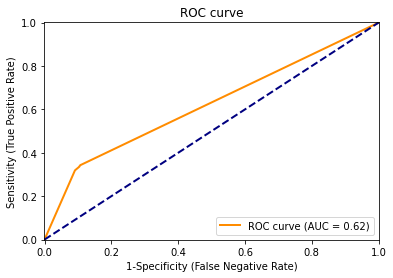

In [49]:
y_pred_prob = clf_DT.predict_proba(X_test)[:,1] 
y_pred = clf_DT.predict(X_test)

print('Metrics of the DT model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))
print("")
print("   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("     Recall: " + str(custom_sensitivity_score(y_test, y_pred)))
print("Specificity: " + str(custom_specificity_score(y_test, y_pred)))
print("  Precision: " + str(custom_ppv_score(y_test, y_pred)))
precision = custom_ppv_score(y_test, y_pred)
recall = custom_sensitivity_score(y_test, y_pred)
print("         F1: " + str(round(2*precision*recall/(precision+recall),3)))
print("        AUC: " + str(round(roc_auc_score(y_test, y_pred_prob),3)))
plot_roc(y_test, y_pred_prob)

### Hyper-parameter tuning - DT

In [50]:
gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [2,4,6,8,10,12], 
                               'criterion':['gini','entropy'], 
                               'min_samples_leaf':[1,2,3,4,5],
                               'max_leaf_nodes': [18,20,22,24,26,28,30],
                               'min_samples_split':[2,3,4,5,6]}],
                  scoring='accuracy',
                  n_jobs=4)
gs_dt = gs_dt.fit(X_train,y_train)
print("Best Accuracy: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)

Best Accuracy:  0.9003155850855462
Optimal Parameter:  {'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 22, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [190]:
tuned_clf_DT = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 1, max_depth = 6, min_samples_split = 2, max_leaf_nodes = 22, random_state=0) 

tuned_clf_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=22, random_state=0)

Metrics of the DT model: 

Confusion matrix: 
[[10747  1002]
 [  218   390]]

   Accuracy: 0.9012705349194788
     Recall: 0.2801724137931034
Specificity: 0.9801185590515276
  Precision: 0.6414473684210527
         F1: 0.39
        AUC: 0.78


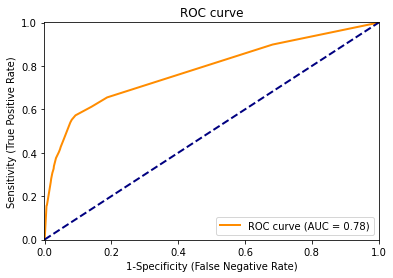

In [191]:
y_pred_prob = tuned_clf_DT.predict_proba(X_test)[:,1] 
y_pred = tuned_clf_DT.predict(X_test)

print('Metrics of the DT model: \n')

cm_dt = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm_dt))
print("")
print("   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("     Recall: " + str(custom_sensitivity_score(y_test, y_pred)))
print("Specificity: " + str(custom_specificity_score(y_test, y_pred)))
print("  Precision: " + str(custom_ppv_score(y_test, y_pred)))
precision = custom_ppv_score(y_test, y_pred)
recall = custom_sensitivity_score(y_test, y_pred)
print("         F1: " + str(round(2*precision*recall/(precision+recall),3)))
print("        AUC: " + str(round(roc_auc_score(y_test, y_pred_prob),3)))
plot_roc(y_test, y_pred_prob)

### Hyper-parameter tuning - DT with oversampling

In [141]:
gs_dt_o = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [2,4,6,8,10,12], 
                               'criterion':['gini','entropy'], 
                               'min_samples_leaf':[1,2,3,4,5],
                               'max_leaf_nodes': [18,20,22,24,26,28,30],
                               'min_samples_split':[2,3,4,5,6]}],
                  scoring='accuracy',
                  n_jobs=1)
gs_dt_o = gs_dt_o.fit(X_train_o,y_train_o)

In [142]:
print("Best Accuracy: ", gs_dt_o.best_score_)
print("Optimal Parameter: ", gs_dt_o.best_params_)

Best Accuracy:  0.7797789319919884
Optimal Parameter:  {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [143]:
tuned_clf_DT_o = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 1, max_depth = 10, min_samples_split = 2, max_leaf_nodes = 30, random_state=0) 

tuned_clf_DT_o.fit(X_train_o, y_train_o)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30, random_state=0)

Metrics of the DT model: 

Confusion matrix: 
[[9862 2963]
 [1103 4346]]

   Accuracy: 0.7774980847105176
     Recall: 0.5946093856888768
Specificity: 0.899407204742362
  Precision: 0.7975775371627821
         F1: 0.681
        AUC: 0.79


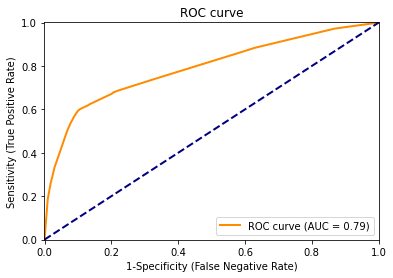

In [144]:
y_pred_prob = tuned_clf_DT_o.predict_proba(X_test_o)[:,1] 
y_pred = tuned_clf_DT_o.predict(X_test_o)

print('Metrics of the DT model: \n')

cm_dt_o = np.transpose(confusion_matrix(y_test_o, y_pred))
print("Confusion matrix: \n" + str(cm_dt))
print("")
print("   Accuracy: " + str(custom_accuracy_score(y_test_o, y_pred))) 
print("     Recall: " + str(custom_sensitivity_score(y_test_o, y_pred)))
print("Specificity: " + str(custom_specificity_score(y_test_o, y_pred)))
print("  Precision: " + str(custom_ppv_score(y_test_o, y_pred)))
precision = custom_ppv_score(y_test_o, y_pred)
recall = custom_sensitivity_score(y_test_o, y_pred)
print("         F1: " + str(round(2*precision*recall/(precision+recall),3)))
print("        AUC: " + str(round(roc_auc_score(y_test_o, y_pred_prob),3)))
plot_roc(y_test_o, y_pred_prob)

### Random Forest

In [55]:
clf_RF = RandomForestClassifier(random_state=0) 
clf_RF.fit(X_train, y_train)

y_pred_prob = clf_RF.predict_proba(X_test)[:,1]  
y_pred = clf_RF.predict(X_test)
#y_pred = np.where(y_pred_prob > 0.5, 1, 0)

Metrics of the RF: 

Confusion matrix: 
[[9961  947]
 [1004  445]]

   Accuracy: 0.8905883305009307
     Recall: 0.2988505747126437
Specificity: 0.9657090743274054
  Precision: 0.5252525252525253
         F1: 0.381
        AUC: 0.768


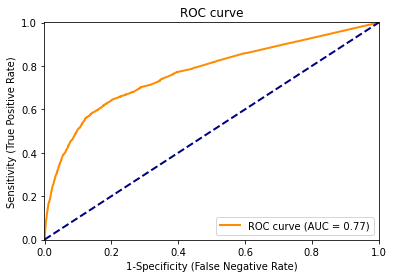

In [56]:
print('Metrics of the RF: \n')

cm_rf_base = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))
print("")
print("   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("     Recall: " + str(custom_sensitivity_score(y_test, y_pred)))
print("Specificity: " + str(custom_specificity_score(y_test, y_pred)))
print("  Precision: " + str(custom_ppv_score(y_test, y_pred)))
precision = custom_ppv_score(y_test, y_pred)
recall = custom_sensitivity_score(y_test, y_pred)
print("         F1: " + str(round(2*precision*recall/(precision+recall),3)))
print("        AUC: " + str(round(roc_auc_score(y_test, y_pred_prob),3)))
plot_roc(y_test, y_pred_prob)

### Hyper-parameter tuning - RF

In [57]:
gs_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                  param_grid=[{'n_estimators': [100,200,300], 
                               'criterion':['gini','entropy','log_loss'], 
                               'max_depth': [3,5,7,10,None],
                               'min_samples_split':[2,3,4,5,6]}],
                  scoring='accuracy',
                  n_jobs=4)
gs_rf = gs_rf.fit(X_train,y_train)
print("Best Accuracy: ", gs_rf.best_score_)
print("Optimal Parameter: ", gs_rf.best_params_)

Best Accuracy:  0.8995873215270709
Optimal Parameter:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 100}


In [225]:
tuned_clf_RF = RandomForestClassifier(criterion = 'entropy', max_depth = 10, min_samples_split = 4, n_estimators = 100, random_state=0) 

tuned_clf_RF.fit(X_train, y_train)

y_pred_prob = tuned_clf_RF.predict_proba(X_test)[:,1] 
y_pred = tuned_clf_RF.predict(X_test)
#y_pred = np.where(y_pred_prob > 0.5, 1, 0)

Metrics of the RF: 

Confusion matrix: 
[[10826  1072]
 [  139   320]]

   Accuracy: 0.9019988670389253
     Recall: 0.22988505747126436
Specificity: 0.9873233014135887
  Precision: 0.6971677559912854
         F1: 0.346
        AUC: 0.796


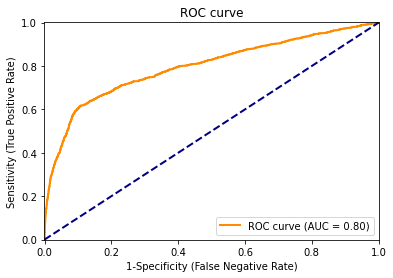

In [226]:
print('Metrics of the RF: \n')

cm_rf = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm_rf))
print("")
print("   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("     Recall: " + str(custom_sensitivity_score(y_test, y_pred)))
print("Specificity: " + str(custom_specificity_score(y_test, y_pred)))
print("  Precision: " + str(custom_ppv_score(y_test, y_pred)))
precision = custom_ppv_score(y_test, y_pred)
recall = custom_sensitivity_score(y_test, y_pred)
print("         F1: " + str(round(2*precision*recall/(precision+recall),3)))
print("        AUC: " + str(round(roc_auc_score(y_test, y_pred_prob),3)))
plot_roc(y_test, y_pred_prob)

#### Feature Importance

<AxesSubplot:title={'center':'Feature Importance'}, xlabel='Decrease in entropy'>

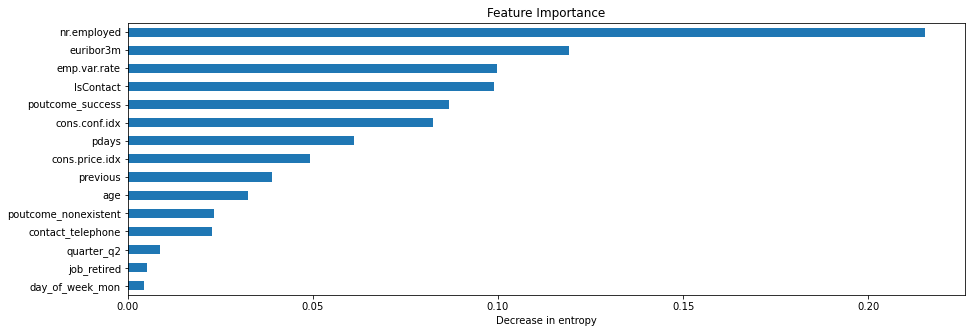

In [64]:
importances = gs_rf.best_estimator_.feature_importances_ 

# plot them
plt.figure(figsize=(15,5))
plt.title('Feature Importance')
plt.xlabel('Decrease in entropy')
feature_importances = pd.Series(tuned_clf_RF.feature_importances_, index=X_train.columns)
feature_importances.nlargest(15).sort_values().plot(kind='barh', align='center')

### Hyper-parameter runing - RF with oversampling

In [69]:
gs_rf_o = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                  param_grid=[{'n_estimators': [30,50,70,90],
                               'max_depth': [3,5,7,10,None]}],
                  scoring='accuracy',
                  n_jobs=4)
gs_rf_o = gs_rf_o.fit(X_train_o,y_train_o)
print("Best Accuracy: ", gs_rf_o.best_score_)
print("Optimal Parameter: ", gs_rf_o.best_params_)

Best Accuracy:  0.9264522267970783
Optimal Parameter:  {'max_depth': None, 'n_estimators': 50}


In [261]:
tuned_clf_RF_o = RandomForestClassifier(max_depth = None, n_estimators = 50, random_state=0) 

tuned_clf_RF_o.fit(X_train_o, y_train_o)

y_pred_prob = tuned_clf_RF_o.predict_proba(X_test_o)[:,1] 
y_pred = tuned_clf_RF_o.predict(X_test_o)
#y_pred = np.where(y_pred_prob > 0.5, 1, 0)

Metrics of the RF: 

Confusion matrix: 
[[10026   152]
 [  939  7157]]

   Accuracy: 0.9402976907081099
     Recall: 0.9792037214393214
Specificity: 0.9143638850889193
  Precision: 0.8840167984189723
         F1: 0.929
        AUC: 0.983


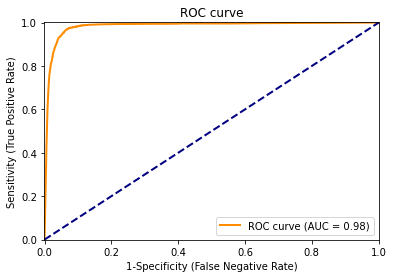

In [265]:
print('Metrics of the RF: \n')

cm_rf_o = np.transpose(confusion_matrix(y_test_o, y_pred))
print("Confusion matrix: \n" + str(cm_rf_o))
print("")
print("   Accuracy: " + str(custom_accuracy_score(y_test_o, y_pred))) 
print("     Recall: " + str(custom_sensitivity_score(y_test_o, y_pred)))
print("Specificity: " + str(custom_specificity_score(y_test_o, y_pred)))
print("  Precision: " + str(custom_ppv_score(y_test_o, y_pred)))
precision = custom_ppv_score(y_test_o, y_pred)
recall = custom_sensitivity_score(y_test_o, y_pred)
print("         F1: " + str(round(2*precision*recall/(precision+recall),3)))
print("        AUC: " + str(round(roc_auc_score(y_test_o, y_pred_prob),3)))
plot_roc(y_test_o, y_pred_prob)

<AxesSubplot:title={'center':'Feature Importance'}, xlabel='Decrease in entropy'>

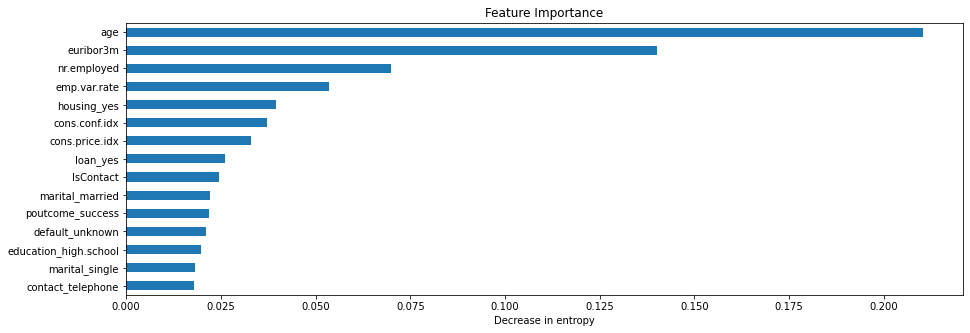

In [242]:
importances = gs_rf_o.best_estimator_.feature_importances_ 

# plot them
plt.figure(figsize=(15,5))
plt.title('Feature Importance')
plt.xlabel('Decrease in entropy')
feature_importances = pd.Series(tuned_clf_RF_o.feature_importances_, index=X_train.columns)
feature_importances.nlargest(15).sort_values().plot(kind='barh', align='center')

### Neural Network

In [153]:
# !conda install tensorflow keras 

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [174]:
# Define the architecture and optimization metrics for the network
def create_model():
    model = keras.Sequential([
        layers.Dense(128,  activation="tanh", name="hidden-dense-128-layer-1"),
        layers.Dropout(0.3),
        layers.Dense(64, activation="tanh", name="hidden-dense-64-layer-2"),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid', name="output-layer"),
    ])
    adam = tf.keras.optimizers.Adam()
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

nn_estimators = []
nn_estimators.append(('standardize', StandardScaler())) #scale the data
nn_estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=30, batch_size=128, validation_split=0.3))) # compile the model

# Define the TensorFlow Neural Network model and call it classifier_TF_NN
Classifier_TF_NN = Pipeline(nn_estimators, verbose=False)

# Train the model classifier_SVM on the training data
Classifier_TF_NN.fit(X_train, y_train)

Epoch 1/30
158/158 [==============================] - 1s 3ms/step - loss: 0.3981 - accuracy: 0.8443 - val_loss: 0.2902 - val_accuracy: 0.8964
Epoch 2/30
158/158 [==============================] - 0s 2ms/step - loss: 0.3050 - accuracy: 0.8910 - val_loss: 0.2871 - val_accuracy: 0.8965
Epoch 3/30
158/158 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 0.8931 - val_loss: 0.2876 - val_accuracy: 0.8988
Epoch 4/30
158/158 [==============================] - 0s 2ms/step - loss: 0.2952 - accuracy: 0.8942 - val_loss: 0.2824 - val_accuracy: 0.8984
Epoch 5/30
158/158 [==============================] - 0s 3ms/step - loss: 0.2934 - accuracy: 0.8962 - val_loss: 0.2831 - val_accuracy: 0.8997
Epoch 6/30
158/158 [==============================] - 1s 7ms/step - loss: 0.2911 - accuracy: 0.8965 - val_loss: 0.2828 - val_accuracy: 0.8986
Epoch 7/30
158/158 [==============================] - 1s 9ms/step - loss: 0.2879 - accuracy: 0.8965 - val_loss: 0.2802 - val_accuracy: 0.8995
Epoch 

Pipeline(steps=[('standardize', StandardScaler()),
                ('mlp',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021310230FA0>)])

387/387 [==============================] - 0s 791us/step
Metrics of the Tensor Flow Neural Network model: 

Confusion matrix: 
[[10833  1082]
 [  132   310]]

   Accuracy: 0.9017560896657765
     Recall: 0.22270114942528735
Specificity: 0.9879616963064295
  Precision: 0.7013574660633484
         F1: 0.338
        AUC: 0.791


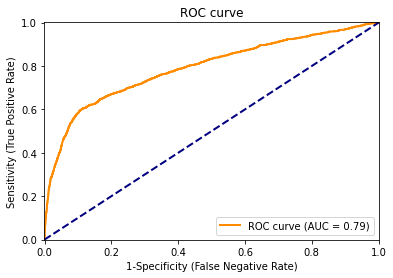

In [175]:
# use the fitted model to predict the testing data 
y_pred_prob = Classifier_TF_NN.predict_proba(X_test)[:,1] 
y_pred = Classifier_TF_NN.predict(X_test)


# Lets look at the model metrics

print('Metrics of the Tensor Flow Neural Network model: \n')

cm_nn = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm_nn))
print("")
print("   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("     Recall: " + str(custom_sensitivity_score(y_test, y_pred)))
print("Specificity: " + str(custom_specificity_score(y_test, y_pred)))
print("  Precision: " + str(custom_ppv_score(y_test, y_pred)))
precision = custom_ppv_score(y_test, y_pred)
recall = custom_sensitivity_score(y_test, y_pred)
print("         F1: " + str(round(2*precision*recall/(precision+recall),3)))
print("        AUC: " + str(round(roc_auc_score(y_test, y_pred_prob),3)))
plot_roc(y_test, y_pred_prob)

### NN with oversampling

In [241]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

def create_model():
    model = keras.Sequential([
        layers.Dense(128,  activation="relu", name="hidden-dense-128-layer-1"),
        layers.Dropout(0.3),
        layers.Dense(64, activation="relu", name="hidden-dense-64-layer-2"),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid', name="output-layer"),
    ])
    adam = tf.keras.optimizers.Adam()
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

nn_estimators = []
nn_estimators.append(('standardize', StandardScaler())) #scale the data
nn_estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=100, batch_size=64, callbacks=[callback], validation_split=0.3))) # compile the model

# Define the TensorFlow Neural Network model and call it classifier_TF_NN
Classifier_TF_NN_o = Pipeline(nn_estimators, verbose=False)

# Train the model classifier_SVM on the training data
Classifier_TF_NN_o.fit(X_train_o, y_train_o)

Epoch 1/100
467/467 [==============================] - 4s 6ms/step - loss: 0.5459 - accuracy: 0.7466 - val_loss: 0.5302 - val_accuracy: 0.7548
Epoch 2/100
467/467 [==============================] - 3s 5ms/step - loss: 0.5230 - accuracy: 0.7631 - val_loss: 0.5242 - val_accuracy: 0.7593
Epoch 3/100
467/467 [==============================] - 2s 5ms/step - loss: 0.5178 - accuracy: 0.7663 - val_loss: 0.5211 - val_accuracy: 0.7585
Epoch 4/100
467/467 [==============================] - 2s 5ms/step - loss: 0.5119 - accuracy: 0.7687 - val_loss: 0.5197 - val_accuracy: 0.7613
Epoch 5/100
467/467 [==============================] - 2s 5ms/step - loss: 0.5091 - accuracy: 0.7692 - val_loss: 0.5139 - val_accuracy: 0.7602
Epoch 6/100
467/467 [==============================] - 3s 5ms/step - loss: 0.5059 - accuracy: 0.7721 - val_loss: 0.5147 - val_accuracy: 0.7619
Epoch 7/100
467/467 [==============================] - 3s 5ms/step - loss: 0.5024 - accuracy: 0.7720 - val_loss: 0.5119 - val_accuracy: 0.7627

Pipeline(steps=[('standardize', StandardScaler()),
                ('mlp',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x000002130C923BB0>)])

572/572 [==============================] - 1s 2ms/step
Metrics of the Tensor Flow Neural Network model: 

Confusion matrix: 
[[9794 2518]
 [1171 4791]]

   Accuracy: 0.7981284885629857
     Recall: 0.6554932275277056
Specificity: 0.8932056543547652
  Precision: 0.8035893995303589
         F1: 0.722
        AUC: 0.861


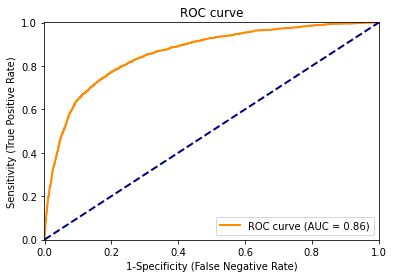

In [240]:
# use the fitted model to predict the testing data 
y_pred_prob = Classifier_TF_NN_o.predict_proba(X_test_o)[:,1] 
y_pred = Classifier_TF_NN_o.predict(X_test_o)


# Lets look at the model metrics

print('Metrics of the Tensor Flow Neural Network model: \n')

cm_nn_o = np.transpose(confusion_matrix(y_test_o, y_pred))
print("Confusion matrix: \n" + str(cm_nn_o))
print("")
print("   Accuracy: " + str(custom_accuracy_score(y_test_o, y_pred))) 
print("     Recall: " + str(custom_sensitivity_score(y_test_o, y_pred)))
print("Specificity: " + str(custom_specificity_score(y_test_o, y_pred)))
print("  Precision: " + str(custom_ppv_score(y_test_o, y_pred)))
precision = custom_ppv_score(y_test_o, y_pred)
recall = custom_sensitivity_score(y_test_o, y_pred)
print("         F1: " + str(round(2*precision*recall/(precision+recall),3)))
print("        AUC: " + str(round(roc_auc_score(y_test_o, y_pred_prob),3)))
plot_roc(y_test_o, y_pred_prob)

### GBM

In [156]:
# Define the gradient boosting machine model and call it classifier_GBM
classifier_GBM = GradientBoostingClassifier(random_state=0)

# Train the model classifier_GBM on the training data
classifier_GBM.fit(X_train, y_train)

# A gradient boosting model has many hyper-parameters, for example::
# -- the number of trees in the forest ensemble, 
# -- speed of boosting ("learning rate", "decay rate"), 
# -- max number of leaves on each tree, 
# -- min number of datapoints at a leaf
# and so on

GradientBoostingClassifier(random_state=0)

Metrics of the GBM model: 

Confusion matrix: 
[[10787  1049]
 [  178   343]]

   Accuracy: 0.9007040543821316
     Recall: 0.2464080459770115
Specificity: 0.983766529867761
  Precision: 0.6583493282149712
         F1: 0.359
        AUC: 0.797


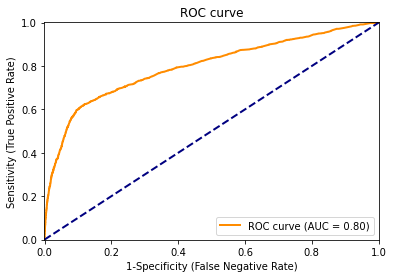

In [157]:
# Use the trained model to predict testing data
y_pred_prob = classifier_GBM.predict_proba(X_test)[:,1] # probabilities 
y_pred = classifier_GBM.predict(X_test) # classification

# Lets look at the model metrics

print('Metrics of the GBM model: \n')

cm_gbm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm_gbm))
print("")
print("   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("     Recall: " + str(custom_sensitivity_score(y_test, y_pred)))
print("Specificity: " + str(custom_specificity_score(y_test, y_pred)))
print("  Precision: " + str(custom_ppv_score(y_test, y_pred)))
precision = custom_ppv_score(y_test, y_pred)
recall = custom_sensitivity_score(y_test, y_pred)
print("         F1: " + str(round(2*precision*recall/(precision+recall),3)))
print("        AUC: " + str(round(roc_auc_score(y_test, y_pred_prob),3)))
plot_roc(y_test, y_pred_prob)

### Hyper-parameter tuning - GBM

In [138]:
gs_gbm = GridSearchCV(estimator=GradientBoostingClassifier(random_state=0),
                  param_grid=[{'n_estimators': [20,30,40,50,60,70], 
                               'learning_rate':[0.01,0.05,0.1]}],
                  scoring='accuracy',
                  n_jobs=1)
gs_gbm = gs_gbm.fit(X_train,y_train)
print("Best Accuracy: ", gs_gbm.best_score_)
print("Optimal Parameter: ", gs_gbm.best_params_)

Best Accuracy:  0.9001074805694437
Optimal Parameter:  {'learning_rate': 0.1, 'n_estimators': 60}


In [139]:
tuned_classifier_GBM = GradientBoostingClassifier(n_estimators = 60, learning_rate = 0.1, random_state=0)

# Train the model classifier_GBM on the training data
tuned_classifier_GBM.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=60, random_state=0)

Metrics of the GBM model: 

Confusion matrix: 
[[10807  1062]
 [  158   330]]

   Accuracy: 0.9012705349194788
     Recall: 0.23706896551724138
Specificity: 0.9855905152758778
  Precision: 0.6762295081967213
         F1: 0.351
        AUC: 0.795


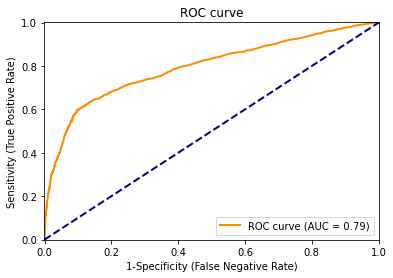

In [140]:
# Use the trained model to predict testing data
y_pred_prob = tuned_classifier_GBM.predict_proba(X_test)[:,1] 
y_pred = tuned_classifier_GBM.predict(X_test) 

# Lets look at the model metrics

print('Metrics of the GBM model: \n')

cm_gbm_tuned = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm_gbm_tuned))
print("")
print("   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("     Recall: " + str(custom_sensitivity_score(y_test, y_pred)))
print("Specificity: " + str(custom_specificity_score(y_test, y_pred)))
print("  Precision: " + str(custom_ppv_score(y_test, y_pred)))
precision = custom_ppv_score(y_test, y_pred)
recall = custom_sensitivity_score(y_test, y_pred)
print("         F1: " + str(round(2*precision*recall/(precision+recall),3)))
print("        AUC: " + str(round(roc_auc_score(y_test, y_pred_prob),3)))
plot_roc(y_test, y_pred_prob)

### Hyper-parameter tuning - GBM with oversampling

In [217]:
gs_gbm_o = GridSearchCV(estimator=GradientBoostingClassifier(random_state=0),
                  param_grid=[{'n_estimators': [40,50,60,70,80], 
                               'learning_rate':[0.05,0.1,0.15],
                               'max_depth':[3,4,5,6]}],
                  scoring='accuracy',
                  n_jobs=1)
gs_gbm_o = gs_gbm_o.fit(X_train_o,y_train_o)
print("Best Accuracy: ", gs_gbm_o.best_score_)
print("Optimal Parameter: ", gs_gbm_o.best_params_)

Best Accuracy:  0.8003000539506887
Optimal Parameter:  {'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 80}


In [219]:
tuned_classifier_GBM_o = GradientBoostingClassifier(n_estimators = 80, max_depth = 6, learning_rate = 0.15, random_state=0)

# Train the model classifier_GBM on the training data
tuned_classifier_GBM_o.fit(X_train_o, y_train_o)

GradientBoostingClassifier(learning_rate=0.15, max_depth=6, n_estimators=80,
                           random_state=0)

Metrics of the GBM model: 

Confusion matrix: 
[[9972 2681]
 [ 993 4628]]

   Accuracy: 0.7989493269125534
     Recall: 0.63319195512382
Specificity: 0.9094391244870041
  Precision: 0.8233410425191248
         F1: 0.716
        AUC: 0.858


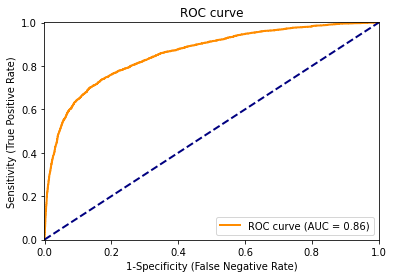

In [220]:
# Use the trained model to predict testing data
y_pred_prob = tuned_classifier_GBM_o.predict_proba(X_test_o)[:,1] 
y_pred = tuned_classifier_GBM_o.predict(X_test_o) 

# Lets look at the model metrics

print('Metrics of the GBM model: \n')

cm_gbm_tuned_o = np.transpose(confusion_matrix(y_test_o, y_pred))
print("Confusion matrix: \n" + str(cm_gbm_tuned_o))
print("")
print("   Accuracy: " + str(custom_accuracy_score(y_test_o, y_pred))) 
print("     Recall: " + str(custom_sensitivity_score(y_test_o, y_pred)))
print("Specificity: " + str(custom_specificity_score(y_test_o, y_pred)))
print("  Precision: " + str(custom_ppv_score(y_test_o, y_pred)))
precision = custom_ppv_score(y_test_o, y_pred)
recall = custom_sensitivity_score(y_test_o, y_pred)
print("         F1: " + str(round(2*precision*recall/(precision+recall),3)))
print("        AUC: " + str(round(roc_auc_score(y_test_o, y_pred_prob),3)))
plot_roc(y_test_o, y_pred_prob)

### XGBoost

In [196]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [197]:
import xgboost as xgb
# create model instance
xgb_model = xgb.XGBClassifier()
# fit model
xgb_model.fit(X_train, y_train)
# make predictions
y_pred_prob = xgb_model.predict_proba(X_test)[:,1]  
y_pred = xgb_model.predict(X_test)

Metrics of the XGBoost: 

Confusion matrix: 
[[10681   974]
 [  284   418]]

   Accuracy: 0.8981953548595938
     Recall: 0.30028735632183906
Specificity: 0.9740994072047423
  Precision: 0.5954415954415955
         F1: 0.399
        AUC: 0.786


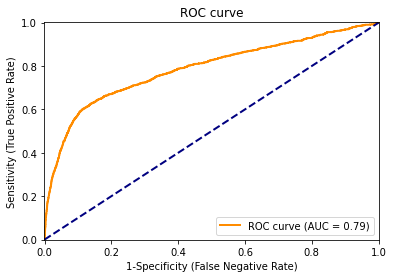

In [198]:
print('Metrics of the XGBoost: \n')

cm_xgb_base = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm_xgb_base))
print("")
print("   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("     Recall: " + str(custom_sensitivity_score(y_test, y_pred)))
print("Specificity: " + str(custom_specificity_score(y_test, y_pred)))
print("  Precision: " + str(custom_ppv_score(y_test, y_pred)))
precision = custom_ppv_score(y_test, y_pred)
recall = custom_sensitivity_score(y_test, y_pred)
print("         F1: " + str(round(2*precision*recall/(precision+recall),3)))
print("        AUC: " + str(round(roc_auc_score(y_test, y_pred_prob),3)))
plot_roc(y_test, y_pred_prob)

### Hyper-parameter tuning - XGBoost

In [200]:
gs_xgb = GridSearchCV(estimator=xgb.XGBClassifier(random_state=0),
                  param_grid=[{'learning_rate': [0.01, 0.1, 1], 
                               'max_depth': [7, 9, 11], 
                               'n_estimators': [100, 200, 300]}],
                  scoring='accuracy',
                  n_jobs=1)
gs_xgb = gs_xgb.fit(X_train,y_train)
print("Best Accuracy: ", gs_xgb.best_score_)
print("Optimal Parameter: ", gs_xgb.best_params_)

Best Accuracy:  0.8998300159007486
Optimal Parameter:  {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200}


In [201]:
tuned_clf_xgb = xgb.XGBClassifier(learning_rate = 0.01, max_depth = 7, n_estimators = 200)

tuned_clf_xgb.fit(X_train, y_train)

y_pred_prob = tuned_clf_xgb.predict_proba(X_test)[:,1] 
y_pred = tuned_clf_xgb.predict(X_test)

Metrics of the XGB: 

Confusion matrix: 
[[10754  1012]
 [  211   380]]

   Accuracy: 0.90102775754633
     Recall: 0.27298850574712646
Specificity: 0.9807569539443685
  Precision: 0.6429780033840947
         F1: 0.383
        AUC: 0.791


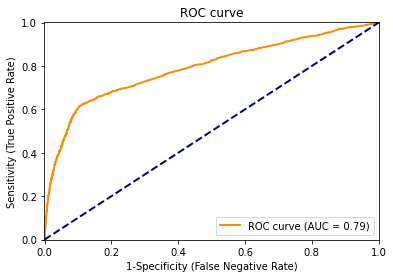

In [202]:
print('Metrics of the XGB: \n')

cm_xgb = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm_xgb))
print("")
print("   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("     Recall: " + str(custom_sensitivity_score(y_test, y_pred)))
print("Specificity: " + str(custom_specificity_score(y_test, y_pred)))
print("  Precision: " + str(custom_ppv_score(y_test, y_pred)))
precision = custom_ppv_score(y_test, y_pred)
recall = custom_sensitivity_score(y_test, y_pred)
print("         F1: " + str(round(2*precision*recall/(precision+recall),3)))
print("        AUC: " + str(round(roc_auc_score(y_test, y_pred_prob),3)))
plot_roc(y_test, y_pred_prob)

### Best parameter with oversampling

In [213]:
gs_xgb_o = GridSearchCV(estimator=xgb.XGBClassifier(random_state=0),
                  param_grid=[{'learning_rate': [0.01, 0.1, 1], 
                               'max_depth': [7, 9, 11], 
                               'n_estimators': [100, 200, 300]}],
                  scoring='accuracy',
                  n_jobs=1)
gs_xgb_o = gs_xgb_o.fit(X_train_o,y_train_o)
print("Best Accuracy: ", gs_xgb_o.best_score_)
print("Optimal Parameter: ", gs_xgb_o.best_params_)

Best Accuracy:  0.9173995234429164
Optimal Parameter:  {'learning_rate': 1, 'max_depth': 11, 'n_estimators': 200}


In [215]:
tuned_clf_xgb_o = xgb.XGBClassifier(learning_rate = 1, max_depth = 11, n_estimators = 200, random_state = 0)

tuned_clf_xgb_o.fit(X_train_o, y_train_o)

y_pred_prob = tuned_clf_xgb_o.predict_proba(X_test_o)[:,1] 
y_pred = tuned_clf_xgb_o.predict(X_test_o)

Metrics of the XGB: 

Confusion matrix: 
[[9975  151]
 [ 990 7158]]

   Accuracy: 0.9375615628762176
     Recall: 0.9793405390614311
Specificity: 0.9097127222982216
  Precision: 0.8784977908689249
         F1: 0.926
        AUC: 0.971


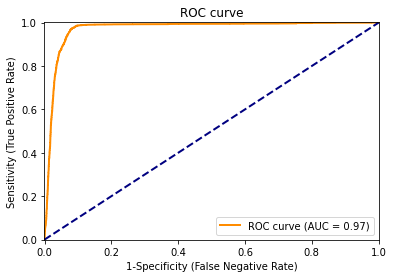

In [216]:
print('Metrics of the XGB: \n')

cm_xgb_o = np.transpose(confusion_matrix(y_test_o, y_pred))
print("Confusion matrix: \n" + str(cm_xgb_o))
print("")
print("   Accuracy: " + str(custom_accuracy_score(y_test_o, y_pred))) 
print("     Recall: " + str(custom_sensitivity_score(y_test_o, y_pred)))
print("Specificity: " + str(custom_specificity_score(y_test_o, y_pred)))
print("  Precision: " + str(custom_ppv_score(y_test_o, y_pred)))
precision = custom_ppv_score(y_test_o, y_pred)
recall = custom_sensitivity_score(y_test_o, y_pred)
print("         F1: " + str(round(2*precision*recall/(precision+recall),3)))
print("        AUC: " + str(round(roc_auc_score(y_test_o, y_pred_prob),3)))
plot_roc(y_test_o, y_pred_prob)

### Stacking

In [102]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [281]:
from mlxtend.classifier import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define the base models
base_models = [
    tuned_clf_RF,
    classifier_GBM,
    Classifier_TF_NN
]

# Define the meta-model
meta_model = Classifier_TF_NN

# Define the stacking classifier
stacking_classifier = StackingClassifier(
    classifiers=base_models,
    meta_classifier=meta_model
)

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

Epoch 1/30
158/158 [==============================] - 1s 3ms/step - loss: 0.3982 - accuracy: 0.8446 - val_loss: 0.2857 - val_accuracy: 0.8968
Epoch 2/30
158/158 [==============================] - 0s 2ms/step - loss: 0.3058 - accuracy: 0.8916 - val_loss: 0.2823 - val_accuracy: 0.8977
Epoch 3/30
158/158 [==============================] - 0s 2ms/step - loss: 0.2976 - accuracy: 0.8938 - val_loss: 0.2837 - val_accuracy: 0.8957
Epoch 4/30
158/158 [==============================] - 0s 2ms/step - loss: 0.2954 - accuracy: 0.8927 - val_loss: 0.2814 - val_accuracy: 0.8987
Epoch 5/30
158/158 [==============================] - 0s 2ms/step - loss: 0.2901 - accuracy: 0.8962 - val_loss: 0.2800 - val_accuracy: 0.9005
Epoch 6/30
158/158 [==============================] - 0s 2ms/step - loss: 0.2889 - accuracy: 0.8971 - val_loss: 0.2820 - val_accuracy: 0.8992
Epoch 7/30
158/158 [==============================] - 0s 2ms/step - loss: 0.2890 - accuracy: 0.8960 - val_loss: 0.2820 - val_accuracy: 0.8987
Epoch 

StackingClassifier(classifiers=[RandomForestClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       min_samples_split=4,
                                                       random_state=0),
                                GradientBoostingClassifier(random_state=0),
                                Pipeline(steps=[('standardize',
                                                 StandardScaler()),
                                                ('mlp',
                                                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021310230FA0>)])],
                   meta_classifier=Pipeline(steps=[('standardize',
                                                    StandardScaler()),
                                                   ('mlp',
                                                    <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021310230FA0>)]))

387/387 [==============================] - 0s 1ms/step
Metrics of the Support Vector Machines model: 

Confusion matrix: 
[[10826  1072]
 [  139   320]]
                                   Accuracy: 0.9019988670389253
                   SENSITIVITY (aka RECALL): 0.22988505747126436
                 SPECIFICITY (aka FALL-OUT): 0.9873233014135887
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.6971677559912854
                 NEGATIVE PREDICTIVE VALUE): 0.9099008236678433


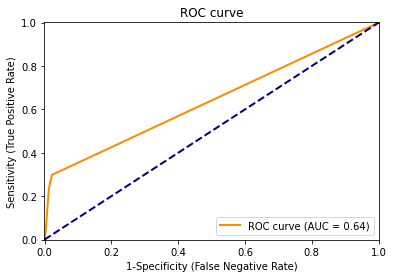

 AUC: 0.6385623208117783


In [282]:
y_pred = stacking_classifier.predict(X_test)
y_pred_prob = stacking_classifier.predict_proba(X_test)[:,1] # probabilities

# Lets look at the model metrics

print('Metrics of the Support Vector Machines model: \n')

cm_st = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm_st))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

### Stacking on oversampled data

In [283]:
base_models = [
    tuned_clf_RF_o,
    tuned_clf_xgb_o
]

# Define the meta-model
meta_model = tuned_clf_RF_o

# Define the stacking classifier
stacking_classifier2 = StackingClassifier(
    classifiers=base_models,
    meta_classifier=meta_model
)

# Train the stacking classifier
stacking_classifier2.fit(X_train_o, y_train_o)

StackingClassifier(classifiers=[RandomForestClassifier(n_estimators=50,
                                                       random_state=0),
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance...
                                              interaction_constraints=None,
                                              learning_rate=1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=11,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=0, ...)],
                   meta_classifier=RandomForestClassifier(n_estimators=50,
                                                          random_state=0))

Metrics of the Support Vector Machines model: 

Confusion matrix: 
[[10026   152]
 [  939  7157]]
                                   Accuracy: 0.9402976907081099
                   SENSITIVITY (aka RECALL): 0.9792037214393214
                 SPECIFICITY (aka FALL-OUT): 0.9143638850889193
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.8840167984189723
                 NEGATIVE PREDICTIVE VALUE): 0.9850658282570249


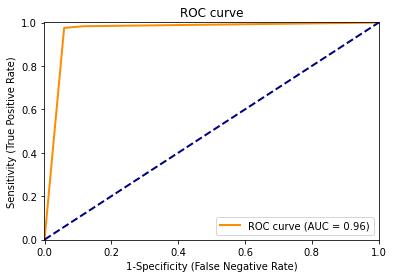

 AUC: 0.9613214710645702


In [284]:
y_pred = stacking_classifier2.predict(X_test_o)
y_pred_prob = stacking_classifier2.predict_proba(X_test_o)[:,1] # probabilities

# Lets look at the model metrics

print('Metrics of the Support Vector Machines model: \n')

cm_st_o = np.transpose(confusion_matrix(y_test_o, y_pred))
print("Confusion matrix: \n" + str(cm_st_o))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test_o, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test_o, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test_o, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test_o, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test_o, y_pred)))

plot_roc(y_test_o, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test_o, y_pred_prob)))

## Cost

In [243]:
def cost(cm):
    # failing to target people who are going subscribe is more costly than targeting those who don't subscribe
    # it is more costly for a false negative than a false positive
    # in other words, false positive: false negative has a cost ratio of 1:5
    cost_matrix = [[0, 0], [-20, 200]]
    CM = cm / cm.sum()
    cost = (CM * cost_matrix).sum()
    return cost

In [278]:
cm_rf_o

array([[10026,   152],
       [  939,  7157]], dtype=int64)

In [270]:
CM = cm_rf_o / cm_rf_o.sum()
CM

array([[0.54864835, 0.00831783],
       [0.05138448, 0.39164934]])

In [272]:
CM * [[0,0],[-20,200]]

array([[ 0.        ,  0.        ],
       [-1.02768961, 78.32986757]])

In [279]:
print('The cost of the Decision Tree model is: ' + str(cost(cm)))
print('The cost of the Random Forest model is: ' + str(cost(cm_rf_base)))
print('The cost of the Neural Network model is: ' + str(cost(cm_nn)))
print('The cost of the Tuned Decision Tree model is: ' + str(cost(cm_dt)))
print('The cost of the Tuned Random Forest model is: ' + str(cost(cm_rf)))
print('The cost of the GBM model is: ' + str(cost(cm_gbm_tuned)))

The cost of the Decision Tree model is: 7.275228615359715
The cost of the Random Forest model is: 6.124463866634297
The cost of the Neural Network model is: 4.803754956704701
The cost of the Tuned Decision Tree model is: 5.959375252893096
The cost of the Tuned Random Forest model is: 4.954276928056972
The cost of the GBM model is: 5.085376709557337


In [280]:
print('The cost of the oversampled tuned Random Forest is: ' + str(cost(cm_rf_o)))
print('The cost of the oversampled tuned XGBoost: ' + str(cost(cm_xgb_o)))
print('The cost of the oversampled stacking model is: ' + str(cost(cm_st_o)))

The cost of the oversampled tuned Random Forest is: 77.30217795775418
The cost of the oversampled tuned XGBoost: 77.25730546131116
The cost of the oversampled stacking model is: 77.30217795775418


### ROC graphs combined

Epoch 1/30
158/158 [==============================] - 1s 3ms/step - loss: 0.3960 - accuracy: 0.8415 - val_loss: 0.2923 - val_accuracy: 0.8980
Epoch 2/30
158/158 [==============================] - 0s 2ms/step - loss: 0.3035 - accuracy: 0.8934 - val_loss: 0.2858 - val_accuracy: 0.8986
Epoch 3/30
158/158 [==============================] - 0s 2ms/step - loss: 0.2976 - accuracy: 0.8942 - val_loss: 0.2868 - val_accuracy: 0.8987
Epoch 4/30
158/158 [==============================] - 0s 2ms/step - loss: 0.2947 - accuracy: 0.8940 - val_loss: 0.2819 - val_accuracy: 0.8987
Epoch 5/30
158/158 [==============================] - 0s 2ms/step - loss: 0.2914 - accuracy: 0.8935 - val_loss: 0.2830 - val_accuracy: 0.8998
Epoch 6/30
158/158 [==============================] - 0s 2ms/step - loss: 0.2886 - accuracy: 0.8957 - val_loss: 0.2814 - val_accuracy: 0.8988
Epoch 7/30
158/158 [==============================] - 0s 2ms/step - loss: 0.2878 - accuracy: 0.8972 - val_loss: 0.2799 - val_accuracy: 0.8992
Epoch 

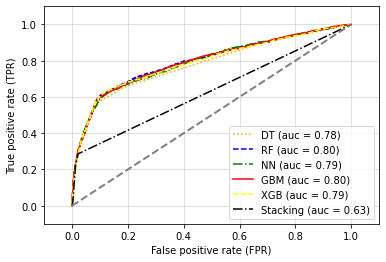

In [291]:
all_clf1 = [tuned_clf_DT, tuned_clf_RF, Classifier_TF_NN, tuned_classifier_GBM,tuned_clf_xgb,stacking_classifier]
clf_labels = ['DT','RF','NN','GBM','XGB','Stacking']

colors = [ 'orange', 'blue', 'green','red','yellow','black']      # colors for visualization
linestyles = [':', '--', '-.', '-','--','-.',':']        # line styles for visualization
for clf, label, clr, ls in zip(all_clf1,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1] # make predictions based on the classifiers
    
    fpr, tpr, thresholds = roc_curve(y_true=y_test,       # build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                           # compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                                    # plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # where to place the legend
plt.plot([0, 1], [0, 1],         # visualize random classifier
         linestyle='--',         # aesthetic parameters
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()

Epoch 1/100
467/467 [==============================] - 2s 2ms/step - loss: 0.5469 - accuracy: 0.7424 - val_loss: 0.5303 - val_accuracy: 0.7554
Epoch 2/100
467/467 [==============================] - 1s 2ms/step - loss: 0.5247 - accuracy: 0.7620 - val_loss: 0.5239 - val_accuracy: 0.7590
Epoch 3/100
467/467 [==============================] - 1s 2ms/step - loss: 0.5160 - accuracy: 0.7672 - val_loss: 0.5219 - val_accuracy: 0.7578
Epoch 4/100
467/467 [==============================] - 1s 2ms/step - loss: 0.5129 - accuracy: 0.7671 - val_loss: 0.5209 - val_accuracy: 0.7591
Epoch 5/100
467/467 [==============================] - 1s 2ms/step - loss: 0.5095 - accuracy: 0.7693 - val_loss: 0.5174 - val_accuracy: 0.7631
Epoch 6/100
467/467 [==============================] - 1s 2ms/step - loss: 0.5056 - accuracy: 0.7699 - val_loss: 0.5149 - val_accuracy: 0.7628
Epoch 7/100
467/467 [==============================] - 1s 2ms/step - loss: 0.5013 - accuracy: 0.7719 - val_loss: 0.5107 - val_accuracy: 0.7627

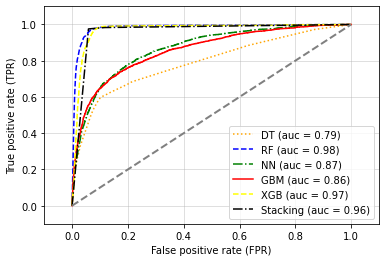

In [289]:
all_clf = [tuned_clf_DT_o, tuned_clf_RF_o, Classifier_TF_NN_o, tuned_classifier_GBM_o,tuned_clf_xgb_o,stacking_classifier2]
clf_labels = ['DT','RF','NN','GBM','XGB','Stacking']

colors = [ 'orange', 'blue', 'green','red','yellow','black']      # colors for visualization
linestyles = [':', '--', '-.', '-','--','-.',':']        # line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train_o, y_train_o).predict_proba(X_test_o)[:, 1] # make predictions based on the classifiers
    
    fpr, tpr, thresholds = roc_curve(y_true=y_test_o,       # build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                           # compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                                    # plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # where to place the legend
plt.plot([0, 1], [0, 1],         # visualize random classifier
         linestyle='--',         # aesthetic parameters
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()